In [1]:
import sys
sys.path.append('../utils/')

In [2]:
from ImageUtils import *

In [3]:
import numpy as np
import pandas as pd # Needs the package Pandas to be installed. Check Anaconda Environments and Packages.
from sklearn.decomposition import PCA # Needs SciKit Learn package to be installed. Check Anaconda Environments and Packages.
import matplotlib.pyplot as plt

In [4]:
face94_male = readFaces94MaleFaces()

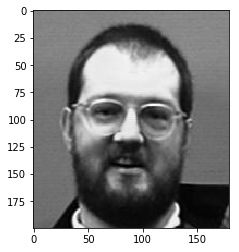

In [5]:
plt.imshow(face94_male[0], plt.cm.gray)

In [7]:
N, height, width = face94_male.shape

In [9]:
pca = PCA(n_components=200, whiten=True).fit(face94_male.reshape(N, height*width))

In [10]:
pca.components_.shape

(200, 36000)

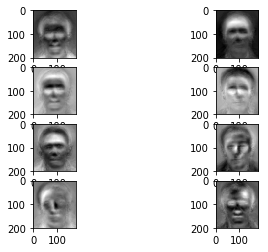

In [23]:
rows = 4
cols = 2
for i in np.arange(rows * cols):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(pca.components_[i].reshape(height, width), plt.cm.gray)

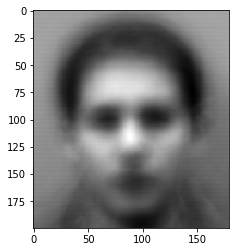

In [17]:
plt.imshow(pca.mean_.reshape(height, width), plt.cm.gray)